In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [401]:
import random
random.seed(101)
# random.seed() make sure that every time when we rerun the code the initial random values would not be changed

## Load dataset

In [402]:
df = pd.read_csv('./Datasets/titanic_data.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [404]:
dict_live = {
    0 : "died",
    1 : "Survived"
}

dict_sex = {
    'male' : 0,
    'female' : 1
}

df['BSex'] = df['Sex'].apply(lambda x : dict_sex[x])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Separating dependent and independent variable

In [405]:
features = df[['Pclass','BSex']].values
labels = df['Survived'].values

features

array([[3, 0],
       [1, 1],
       [3, 1],
       ...,
       [3, 1],
       [1, 0],
       [3, 0]], dtype=int64)

In [406]:
labels

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## Spliting the data

In [407]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

## <font color="green">Multi Layer Perceptron</font>

In [408]:
# activation functions

def sigmoid(x, derivative = False):
    if derivative:
        f = 1/(1 + np.exp(-x)) * (1-1/(1 + np.exp(-x)))
    else:
        f = 1/(1 + np.exp(-x))

    return f

def ReLU(x, derivative = False):
    if derivative:
        f = np.heaviside(x,1)
    else:
        f = np.maximum(x,0)
    
    return f

Training Model

In [409]:
def train_ANN(x_train,y_train,h1_units = 4, h2_units=4, learning_rate = 0.0015):
    random.seed(101)

    # hidden layer 1
    w1 = 2 * np.random.rand(h1_units, x_train.shape[1])
    b1 = np.random.rand(h1_units)

    # hidden layer 2
    w2 = 2 * np.random.rand(h2_units, h1_units)
    b2 = np.random.rand(h2_units)

    # output layer
    w_out = 2 * np.random.rand(h2_units)
    b_out = np.random.rand(1)

    loss = []
    vec_y = []

    for i in range(0, x_train.shape[0]):
        x_data = x_train[i]

        # 2, feed forward
        h1 = ReLU(np.dot(w1, x_data)+b1) # hidden layer 1 output
        h2 = ReLU(np.dot(w2, h1)+b2) # hidden layer 2 output
        y = sigmoid(np.dot(w_out, h2)+b_out) # Output of the output layer

        # 3, Back propagation - Calculate the layer derivatives
        delta_out = (y - y_train[i]) * sigmoid(y, derivative=True)
        delta_2 = delta_out * w_out * ReLU(h2, derivative=True)
        delta_1 = np.dot(delta_2, w2) * ReLU(h1, derivative=True)

        # 5, Gradient descent
        w_out = w_out - learning_rate * delta_out * h2 # output layer
        b_out = b_out - learning_rate * delta_out

        # Hidden layer 2
        w2 = w2 - learning_rate * np.kron(delta_2, h1).reshape(h2_units, h1_units)
        b2 = b2 - learning_rate * delta_2

        # Hidden layer 1
        w1 = w1 - learning_rate * np.kron(delta_1, x_data).reshape(h1_units, x_data.shape[0])
        b1 = b1 - learning_rate * delta_1

        # cost
        loss.append((1/2) * (y - y_train)**2)
        vec_y.append(y[0])
    
    batch_loss = []
    for i in range(0,10):
        loss_avg = 0
        for m in range(0,60):
            loss_avg += vec_y[60*i + m]/60
        batch_loss.append(loss_avg)

    plt.figure(figsize=(10,6))
    plt.plot(np.arange(1, len(batch_loss)+1), batch_loss)
    plt.title("Average loss by epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    return w1, b1, w2, b2, w_out, b_out, loss

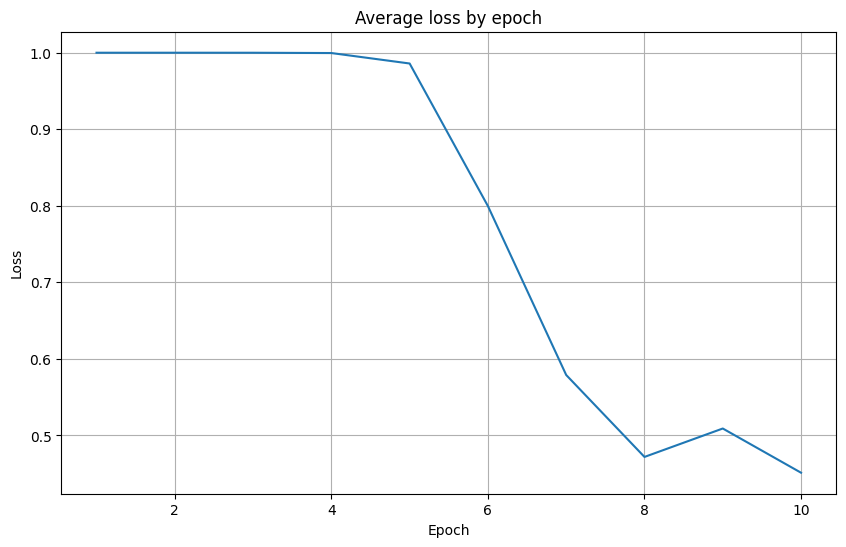

In [410]:
w1, b1, w2, b2, w_out, b_out, loss = train_ANN(x_train, y_train)

Testing Model

In [411]:
def ANN_pred(x_test, w1, b1, w2, b2, w_out, b_out):

    pred = []

    for i in range(0, x_test.shape[0]):
        x_data = x_test[i]

        # 2, feed forward
        z1 = ReLU(np.dot(w1, x_data)+b1) # hidden layer 1 output
        z2 = ReLU(np.dot(w2, z1)+b2) # hidden layer 2 output
        y = sigmoid(np.dot(w_out, z2)+b_out) # Output of the output layer

        pred.append(np.heaviside(y - 0.5, 1)[0])
    
    return np.array(pred)

In [412]:
predictions = ANN_pred(x_test, w1, b1, w2, b2, w_out, b_out)

predictions

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0.

In [413]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

## Model Evaluation

In [415]:
from sklearn.metrics import accuracy_score

accuracy_score(predictions, y_test)

0.7574626865671642

*heaviside function*

In [414]:
lst = [0.2, 0.3, 0.5, 0.7]
ans = []

for i in lst:
    ans.append(np.heaviside(i-0.5, 1))

ans

[0.0, 0.0, 1.0, 1.0]